In [20]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2021-05-25  395.107056  397.440441  394.521353  397.081454  57451400   
2021-05-26  395.891144  396.401256  394.653603  395.702194  43088600   
2021-05-27  396.098969  397.449868  395.815544  396.930300  56707700   
2021-05-28  396.807434  397.950500  396.571262  397.685989  58520200   
2021-06-01  396.458008  399.339300  396.014002  399.197603  54216600   

Price             RSI  Strategy  
Date                             
2021-05-25  49.108876       NaN  
2021-05-26  50.000000       0.0  
2021-05-27  46.825243       0.0  
2021-05-28  52.552184       0.0  
2021-06-01  57.226202       0.0  


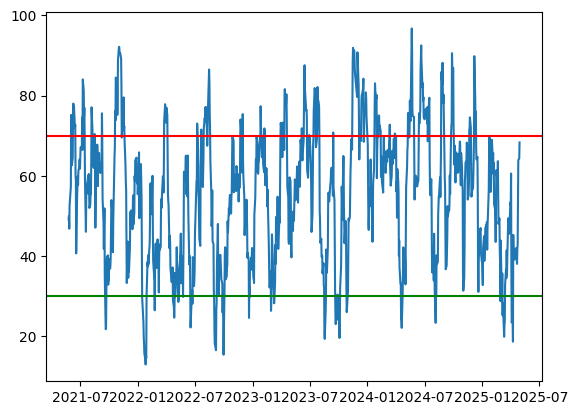

In [ ]:
TICKER = 'SPY'
RSI_LENGTH = 14
OVERBOUGHT = 70
OVERSOLD = 30
LOOKBACK = 1000

def get_data(ticker=TICKER):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_RSI(df, length=RSI_LENGTH):

    price_change = df['Close'].diff()
    
    # separate gains/losses
    gain = price_change.where(price_change > 0, 0)
    loss = -price_change.where(price_change < 0, 0)

    # average gain vs loss
    avg_gain = gain.rolling(window=length).mean()
    avg_loss = loss.rolling(window=length).mean()

    # calculate rsi
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi

    # plot the relative strength index
    plt.plot(df['RSI'])
    plt.axhline(OVERBOUGHT, color='red')
    plt.axhline(OVERSOLD, color='green')

    return df.dropna()

def add_strategy(df, overbought=OVERBOUGHT, oversold=OVERSOLD):

    df['Strategy'] = 0
    df['Strategy'] = np.where(df['RSI'] > overbought, -1, 
                     np.where(df['RSI'] < oversold, 1, 0))
    
    # shift back to make sure we have seen the signal
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    

def main():
    df = get_data()
    df = add_RSI(df)
    df = add_strategy(df)
    print(df.head())

    return df


df = main()

In [25]:
df['Strategy'].value_counts()

Strategy
 0.0    727
-1.0    191
 1.0     68
Name: count, dtype: int64